## Shanice Bailey
# CryoSat-2: Dynamic Topography of Southern Ocean

My Binder link: https://hub.mybinder.org/user/stb2145-rces-finalproject-mb7ozrhw/tree

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from glob import glob
import xarray as xr
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature

In [2]:
! wget http://rkwok.jpl.nasa.gov/rgpsftp/cryosat2_topo/CS2_combined_Southern_Ocean_2011-2016.nc

URL transformed to HTTPS due to an HSTS policy
--2018-11-27 18:10:23--  https://rkwok.jpl.nasa.gov/rgpsftp/cryosat2_topo/CS2_combined_Southern_Ocean_2011-2016.nc
Resolving rkwok.jpl.nasa.gov (rkwok.jpl.nasa.gov)... 128.149.112.22
Connecting to rkwok.jpl.nasa.gov (rkwok.jpl.nasa.gov)|128.149.112.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26095988 (25M) [application/x-netcdf]
Saving to: ‘CS2_combined_Southern_Ocean_2011-2016.nc.1’

CS2_combined_Southe 100%[===================>]  24.89M  40.3MB/s    in 0.6s    

2018-11-27 18:10:24 (40.3 MB/s) - ‘CS2_combined_Southern_Ocean_2011-2016.nc.1’ saved [26095988/26095988]



In [2]:
cs2 = 'CS2_combined_Southern_Ocean_2011-2016.nc'
ds = xr.open_dataset(cs2, decode_times=False)
ds = ds.set_coords(['Latitude', 'Longitude', 'Area'])
ds

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, date: 72)
Coordinates:
  * date       (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Data variables:
    DOT        (date, Y, X) float32 ...
    SLA        (date, Y, X) float32 ...
    MDT        (Y, X) float32 ...
Attributes:
    Title:        CS2_combined_Southern_Ocean_2011-2016.nc
    Description:  Monthly merged dynamic ocean topography, sea level anomaly ...
    Projection::  Southern hemisphere SSM/I polar stereographic grid (https:/...
    Reference:    Armitage et al., Dynamic topography and sea level anomalies...

In [3]:
ds.attrs['Projection:']

'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'

In [23]:
ds.attrs

OrderedDict([('Title', 'CS2_combined_Southern_Ocean_2011-2016.nc'),
             ('Description',
              'Monthly merged dynamic ocean topography, sea level anomaly and mean sea surface records of the ice-covered and ice-free Southern Ocean between 2011-2016 from CryoSat-2 radar altimetry.'),
             ('Projection:',
              'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'),
             ('Reference',
              'Armitage et al., Dynamic topography and sea level anomalies of the Southern Ocean: Variability and teleconnections, JGR-Oceans.')])

In [4]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X        (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y        (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
Attributes:
    units:       cm
    fill_value:  NaN

In [6]:
ccrs.Stereographic?

Init signature: ccrs.Stereographic(central_latitude=0.0, central_longitude=0.0, false_easting=0.0, false_northing=0.0, true_scale_latitude=None, scale_factor=None, globe=None)
Docstring:     
Define a projected coordinate system with flat topology and Euclidean
distance.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           /opt/conda/lib/python3.6/site-packages/cartopy/crs.py
Type:           ABCMeta


In [3]:
#Changing X & Y from km to m
ds_scaled = ds.copy()
ds_scaled['X'] = ds['X'] * 1000
ds_scaled['Y'] = ds['Y'] * 1000
# how to change unit names from km to m

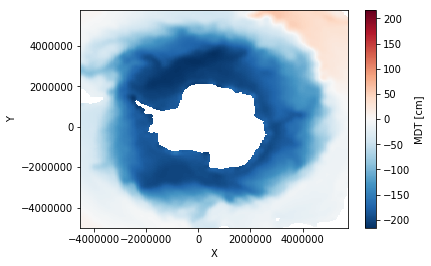

In [5]:
ds_scaled.MDT.plot()

In [9]:
#.values.item()?
# is this value from Latitude value itself or is it of Y?
center_point = {'X':len(ds.X)//2, 'Y':len(ds.Y)//2}
center_lat = ds.Latitude.isel(**center_point).values.item()
center_lat

-83.2791519165039

In [ ]:
proj = ccrs.Stereographic(central_longitude=0, central_latitude=center_lat)

plt.

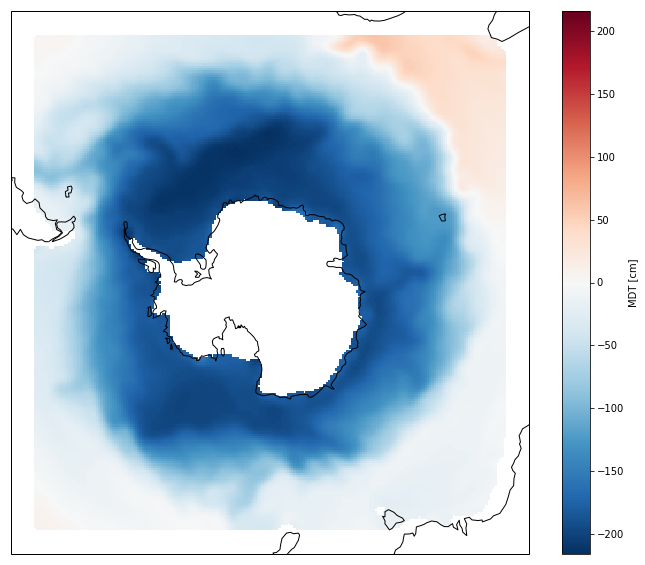

In [27]:
proj = ccrs.Stereographic(central_longitude=0, central_latitude=center_lat, false_northing=8e5)

plt.figure(figsize=(12, 10))
ax = plt.axes(projection=proj)
ax.coastlines()
ds_scaled.MDT.plot()
#ax.add_feature(cfeature.LAND, facecolor='0.9', edgecolor='k')

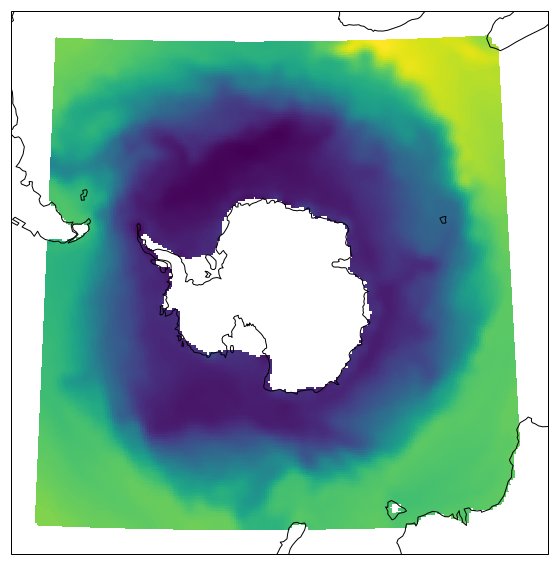

In [29]:
plt.figure(figsize=(12,10))

ax = plt.axes(projection=proj)
ax.coastlines()
ax.pcolormesh(ds.Longitude, ds.Latitude, ds.MDT, transform=ccrs.PlateCarree())

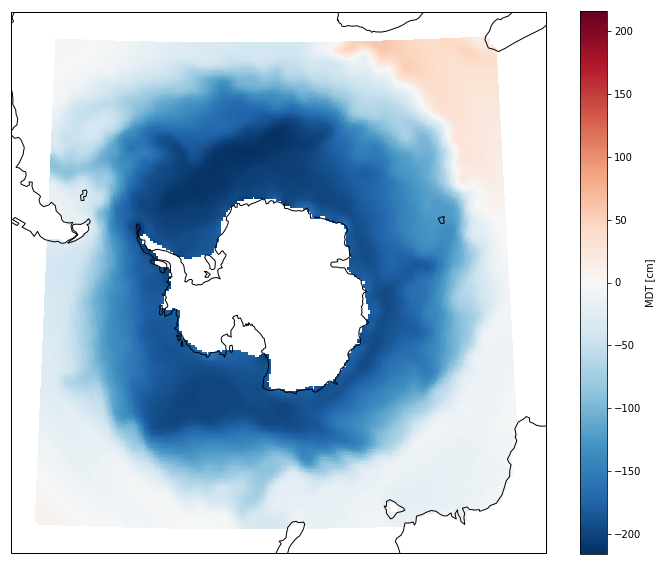

In [31]:
plt.figure(figsize=(12,10))

ax = plt.axes(projection=proj)
ax.coastlines()
ds.MDT.plot(x='Longitude', y='Latitude', transform=ccrs.PlateCarree())

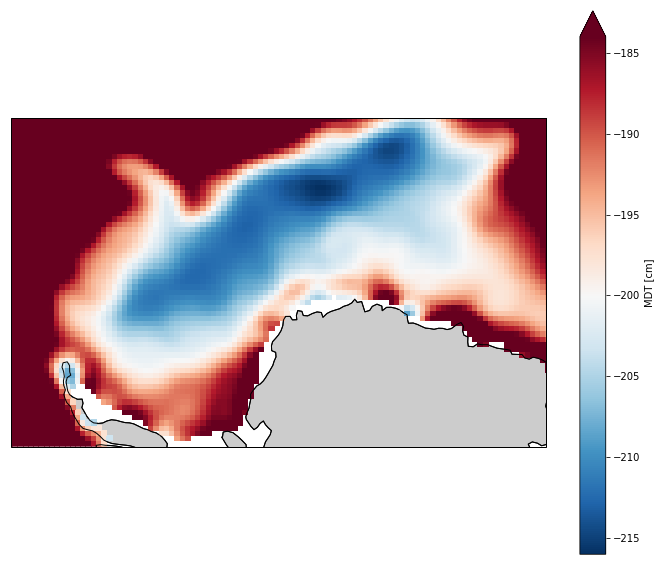

In [103]:
extent = [-50,33,-55,-79]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ds.MDT.plot(x='Longitude', y='Latitude', transform=ccrs.PlateCarree(),cmap='RdBu_r', vmin=-216, vmax=-184)

In [17]:
ds.variables

Frozen(OrderedDict([('date', <xarray.IndexVariable 'date' (date: 72)>
array([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206,
       201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303,
       201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409,
       201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505, 201506,
       201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603,
       201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612],
      dtype=int32)
Attributes:
    units:    YYYYMM), ('X', <xarray.IndexVariable 'X' (X: 205)>
array([-4475., -4425., -4375., ...,  5625.,  5675.,  5725.], dtype=float32)
Attributes:
    units:         km
    registration:  grid cell centerpoint), ('Y', <xarray.IndexVariable 'Y' (Y: 215)>
array(

In [9]:
ds.MDT

<xarray.DataArray 'MDT' (Y: 215, X: 205)>
array([[     nan, 9.321053, 8.922684, ...,      nan,      nan,      nan],
       [9.393326, 9.128281, 8.790092, ...,      nan,      nan,      nan],
       [9.084267, 8.876312, 8.625931, ...,      nan,      nan,      nan],
       ...,
       [4.762772, 4.755409, 4.733826, ...,      nan,      nan,      nan],
       [4.951439, 4.958145, 4.977036, ...,      nan,      nan,      nan],
       [     nan, 5.082672, 5.118813, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 ...
    Area       (Y, X) float32 ...
Attributes:
    units:       cm
    fill_value:  NaN

In [13]:
ds.Longitude.assign_coords()

<xarray.DataArray 'Longitude' (Y: 215, X: 205)>
array([[-138.02869 , -138.34859 , -138.67169 , ...,  131.49097 ,  131.23949 ,
         130.9905  ],
       [-137.74078 , -138.06102 , -138.38452 , ...,  131.20393 ,  130.95279 ,
         130.70415 ],
       [-137.44966 , -137.7702  , -138.09406 , ...,  130.91438 ,  130.66359 ,
         130.41533 ],
       ...,
       [ -38.504196,  -38.19095 ,  -37.87498 , ...,   45.      ,   45.253517,
          45.504795],
       [ -38.257412,  -37.944813,  -37.629528, ...,   44.74648 ,   45.      ,
          45.251293],
       [ -38.013294,  -37.70136 ,  -37.386776, ...,   44.495205,   44.748703,
          45.      ]], dtype=float32)
Coordinates:
  * X        (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y        (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
Attributes:
    units:         Degrees east
    registration:  grid cell centerpoint

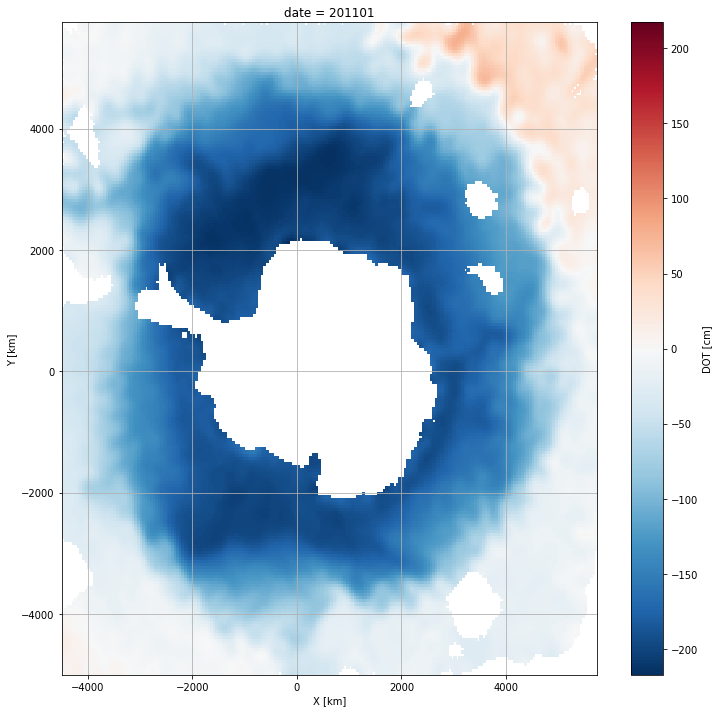

In [65]:
ds.DOT[0].plot(figsize=(12,12))
plt.grid()

In [24]:
ds

<xarray.Dataset>
Dimensions:    (X: 205, Y: 215, date: 72)
Coordinates:
  * date       (date) int32 201101 201102 201103 201104 201105 201106 201107 ...
  * X          (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
  * Y          (Y) float32 -4975.0 -4925.0 -4875.0 -4825.0 -4775.0 -4725.0 ...
Data variables:
    Latitude   (Y, X) float32 ...
    Longitude  (Y, X) float32 -138.02869 -138.34859 -138.67169 -138.99803 ...
    Area       (Y, X) float32 ...
    DOT        (date, Y, X) float32 nan 6.029312 6.931885 8.434265 10.110657 ...
    SLA        (date, Y, X) float32 ...
    MDT        (Y, X) float32 nan 9.321053 8.922684 8.467369 8.0553055 ...
Attributes:
    Title:        CS2_combined_Southern_Ocean_2011-2016.nc
    Description:  Monthly merged dynamic ocean topography, sea level anomaly ...
    Projection::  Southern hemisphere SSM/I polar stereographic grid (https:/...
    Reference:    Armitage et al., Dynamic topography and sea level anomalies...

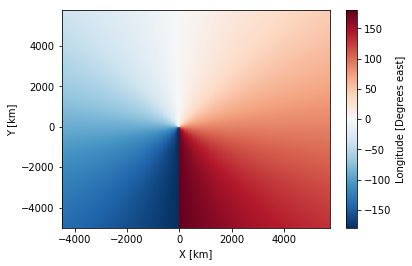

In [26]:
ds.Longitude.plot()

#Lon, Lat are 2D variables, don't really worry about them being variables in this case
ds.assign_coords(ds.Longitude)

ds.Longitude.sel([-78,20], method='nearest')

In [8]:
ds.Longitude[-97]

<xarray.DataArray 'Longitude' (X: 205)>
array([-78.321205, -78.19293 , -78.061844, ...,  80.6616  ,  80.74245 ,
        80.821915], dtype=float32)
Coordinates:
  * X        (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
    Y        float32 925.0
Attributes:
    units:         Degrees east
    registration:  grid cell centerpoint

In [29]:
ds.attrs

OrderedDict([('Title', 'CS2_combined_Southern_Ocean_2011-2016.nc'),
             ('Description',
              'Monthly merged dynamic ocean topography, sea level anomaly and mean sea surface records of the ice-covered and ice-free Southern Ocean between 2011-2016 from CryoSat-2 radar altimetry.'),
             ('Projection:',
              'Southern hemisphere SSM/I polar stereographic grid (https://nsidc.org/data/polar-stereo/ps_grids.html). Resolution: 50km. Bottom left corner: [-4500,-5000]; top right corner: [5750, 5750].'),
             ('Reference',
              'Armitage et al., Dynamic topography and sea level anomalies of the Southern Ocean: Variability and teleconnections, JGR-Oceans.')])

In [63]:
ds.Longitude[-78]

<xarray.DataArray 'Longitude' (X: 205)>
array([-67.26658 , -67.036224, -66.80141 , ...,  71.56505 ,  71.71662 ,
        71.865814], dtype=float32)
Coordinates:
  * X        (X) float32 -4475.0 -4425.0 -4375.0 -4325.0 -4275.0 -4225.0 ...
    Y        float32 1875.0
Attributes:
    units:         Degrees east
    registration:  grid cell centerpoint

In [ ]:
ds.DOT.sel(Latitude=slice(-78,20), Longitude=slice(-60,-75))

### Figure 4a)

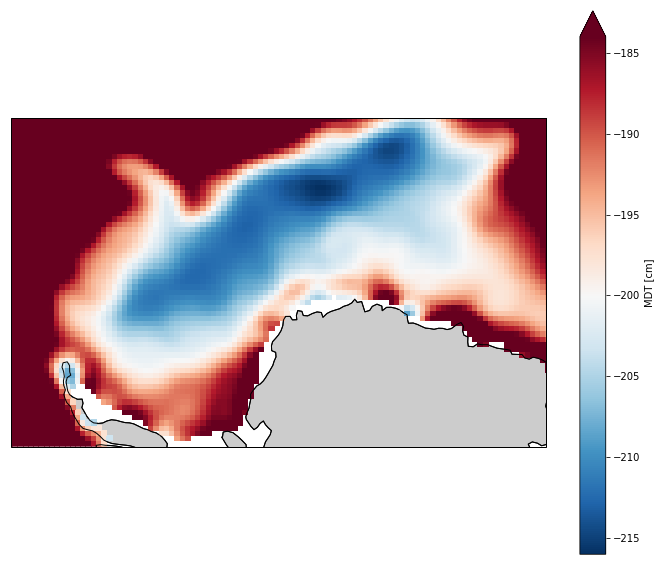

In [105]:
#How to add contouring?
#How to add thick, black line of 1km isobath?
#How to fix colorbar size

extent = [-50,33,-55,-79]
plt.figure(figsize=(12,10))

ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='0.8', edgecolor='k')
ax.set_extent(extent, crs=ccrs.PlateCarree())
ds.MDT.plot(x='Longitude', y='Latitude', transform=ccrs.PlateCarree(),cmap='RdBu_r', vmin=-216, vmax=-184);

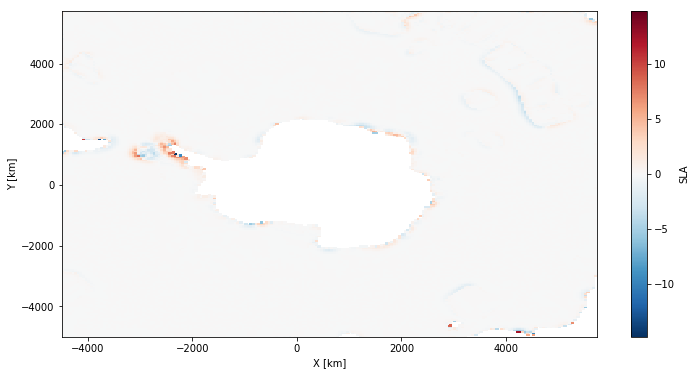

In [5]:
ds.SLA.mean(dim='date').plot(figsize=(12,6))

### Figure 6b)

In [2]:
taux = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERA-1deg/.taux-ERA.nc/.taux/dods'
tauy = 'http://kage.ldeo.columbia.edu:81/home/.datasets/.ERA-1deg/.tauy-ERA.nc/.tauy/dods'

In [4]:
ds_taux = xr.open_dataset(taux, decode_times=False, chunks={'T': 100}).rename({'T':'time', 'X' : 'lon', 'Y' : 'lat'})
ds_taux['time'] = pd.date_range('1979-01-01',periods=ds_taux.time.size,freq='MS')
ds_taux

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 719)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 -85.0 -84.0 -83.0 ...
Data variables:
    taux     (time, lat, lon) float32 dask.array<shape=(719, 181, 360), chunksize=(100, 181, 360)>
Attributes:
    Conventions:  IRIDL